# DEEP LEARNING FOR AUTOMATED MEDICAL IMAGE DIAGNOSIS

By : Sai Sravani Madabhushi(Z23752172),
Vishanth Raj Chowhan Lavudya (Z23755029),
Surya Shashank Pappu (ZZ23763019).



Project Link: https://colab.research.google.com/drive/1IhEOcBLnyg9o3AQNyfKKq0fu5U4t9CUq?usp=sharing

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install tensorflow matplotlib scikit-learn seaborn


In [5]:
%cd /content/drive/MyDrive/Project_DeepLearning



/content/drive/MyDrive/Project_DeepLearning


In [6]:
!ls

 00030724_000.png   data_loader.py    'kaggle (2).json'   __pycache__
 app.py		    evaluate.py        kaggle.json	  train.py
 Chest_Xray	    final_model.h5     model_builder.py
 colab_setup.py    'kaggle (1).json'   predict.py


In [7]:
from data_loader import load_data
from model_builder import build_model
from train import train_model
from evaluate import plot_training_history, evaluate_model
from predict import predict_image


In [8]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle (3).json': b'{"username":"saisravanimadabhushi","key":"22b2a603ea6c106affd445b7e53470f1"}'}

In [9]:
# Make a directory
!mkdir -p ~/.kaggle

# Move kaggle.json to the directory
!cp kaggle.json ~/.kaggle/

# Set permissions

!chmod 600 ~/.kaggle/kaggle.json



In [10]:

# Now download dataset
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia -p /content/

# Unzip
!unzip /content/chest-xray-pneumonia.zip -d /content/NIH_Chest_Xray


Streaming output truncated to the last 5000 lines.
  inflating: /content/NIH_Chest_Xray/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: /content/NIH_Chest_Xray/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: /content/NIH_Chest_Xray/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: /content/NIH_Chest_Xray/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: /content/NIH_Chest_Xray/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: /content/NIH_Chest_Xray/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: /content/NIH_Chest_Xray/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: /content/NIH_Chest_Xray/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: /content/NIH_Chest_Xray/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: /content/NIH_Chest_Xray/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: /content/NIH_Chest_Xray/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: /content/NIH_Chest_X

In [12]:
!cp -r /content/NIH_Chest_Xray/chest_xray/train/NORMAL /content/drive/MyDrive/Project_DeepLearning/Chest_Xray/train/
!cp -r /content/NIH_Chest_Xray/chest_xray/train/PNEUMONIA /content/drive/MyDrive/Project_DeepLearning/Chest_Xray/train/


^C
^C


In [13]:
train_dir = '/content/drive/MyDrive/Project_DeepLearning/Chest_Xray/train'
train_gen, val_gen = load_data(train_dir)


Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [14]:
model = build_model()
model.summary()  # Optional: to see layer details


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,926,209 (68.38 MB)

 Trainable params: 3,211,521 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [17]:
from PIL import Image
import os

# Verify all images before training
def verify_images(directory):
    num_deleted = 0
    for subdir, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(subdir, file)
            try:
                img = Image.open(file_path)
                img.verify()
            except (IOError, SyntaxError):
                print(f"Deleting corrupt image: {file_path}")
                os.remove(file_path)
                num_deleted += 1
    print(f"Deleted {num_deleted} corrupt images.")

verify_images('/content/drive/MyDrive/Project_DeepLearning/Chest_Xray/train')


Deleting corrupt image: /content/drive/MyDrive/Project_DeepLearning/Chest_Xray/train/PNEUMONIA/person1020_bacteria_2951.jpeg
Deleted 1 corrupt images.


In [18]:
train_gen, val_gen = load_data(train_dir)
#reloading the data


Found 4172 images belonging to 2 classes.
Found 1042 images belonging to 2 classes.


In [21]:
history = train_model(model, train_gen, val_gen, epochs=10)


Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.9547 - loss: 0.1393 

131/131 ━━━━━━━━━━━━━━━━━━━━ 3017s 23s/step - accuracy: 0.9546 - loss: 0.1393 - val_accuracy: 0.9655 - val_loss: 0.1018
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 3029s 23s/step - accuracy: 0.9525 - loss: 0.1232 - val_accuracy: 0.9626 - val_loss: 0.0892
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 3022s 23s/step - accuracy: 0.9478 - loss: 0.1405 - val_accuracy: 0.9607 - val_loss: 0.0953
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 3015s 23s/step - accuracy: 0.9501 - loss: 0.1393 - val_accuracy: 0.9511 - val_loss: 0.1164
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 3011s 23s/step - accuracy: 0.9602 - loss: 0.1246 - val_accuracy: 0.9616 - val_loss: 0.0999


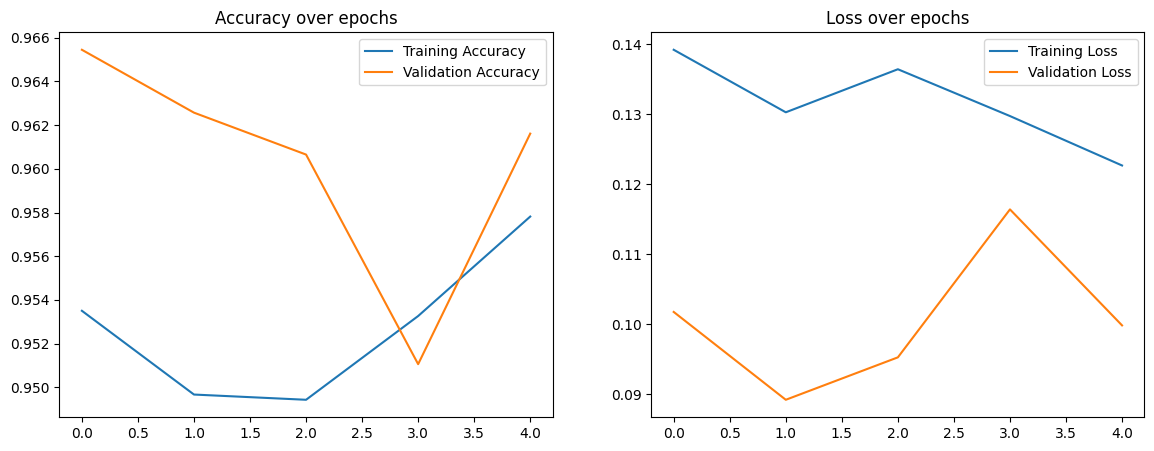

In [22]:
plot_training_history(history)


33/33 ━━━━━━━━━━━━━━━━━━━━ 601s 18s/step
              precision    recall  f1-score   support

      NORMAL       0.30      0.31      0.30       268
   PNEUMONIA       0.76      0.75      0.75       774

    accuracy                           0.63      1042
   macro avg       0.53      0.53      0.53      1042
weighted avg       0.64      0.63      0.64      1042



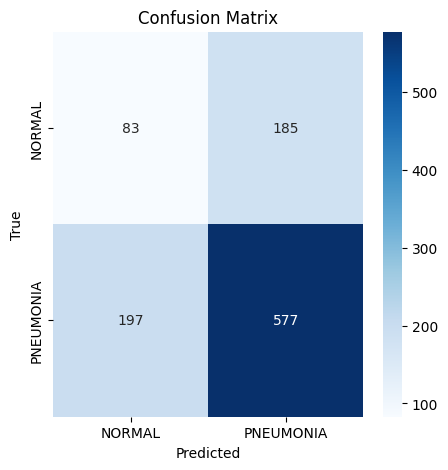

In [24]:
evaluate_model(model, val_gen)


In [25]:
model.save('/content/drive/MyDrive/Project_DeepLearning/Chest_Xray/final_model.h5')


In [26]:
!ls /content/drive/MyDrive/Project_DeepLearning/Chest_Xray/test_image1.jpg


/content/drive/MyDrive/Project_DeepLearning/Chest_Xray/test_image1.jpg


In [27]:
img_path = '/content/drive/MyDrive/Project_DeepLearning/Chest_Xray/test_image1.jpg'
result = predict_image(model, img_path)

if result >= 0.5:
    print("Prediction: Pneumonia Detected 😷")
else:
    print("Prediction: Normal Chest X-ray 🫁")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 812ms/step
Prediction: Normal Chest X-ray 🫁


In [28]:
img_path = '/content/drive/MyDrive/Project_DeepLearning/Chest_Xray/test_image2.jpg'
result = predict_image(model, img_path)

if result >= 0.5:
    print("Prediction: Pneumonia Detected 😷")
else:
    print("Prediction: Normal Chest X-ray 🫁")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
Prediction: Pneumonia Detected 😷


In [29]:
img_path = '/content/drive/MyDrive/Project_DeepLearning/Chest_Xray/test_image3.jpg'
result = predict_image(model, img_path)

if result >= 0.5:
    print("Prediction: Pneumonia Detected 😷")
else:
    print("Prediction: Normal Chest X-ray 🫁")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
Prediction: Normal Chest X-ray 🫁


In [30]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to upload, predict and print output
def upload_and_predict(model, img_size=(224,224)):
    uploaded = files.upload()

    for img_name in uploaded.keys():
        img = cv2.imread(img_name)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_resized = cv2.resize(img, img_size)
        img_normalized = img_resized / 255.0
        img_expanded = np.expand_dims(img_normalized, axis=0)

        prediction = model.predict(img_expanded)[0][0]

        label = "Pneumonia Detected 😷" if prediction >= 0.5 else "Normal Chest X-ray 🫁"

        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
        plt.show()

        print(f"Prediction for {img_name}: {label}")


Saving 1.jpg to 1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129729 (\N{LUNGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


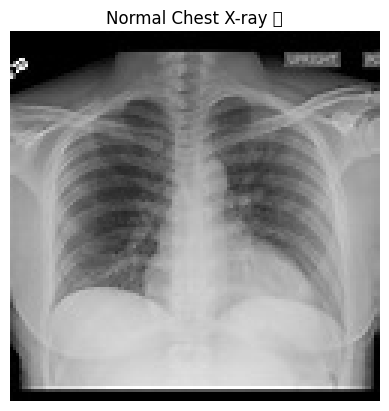

Prediction for 1.jpg: Normal Chest X-ray 🫁


In [31]:
upload_and_predict(model)


In [32]:
!pip install streamlit
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00


In [33]:
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
model.save('/content/drive/MyDrive/Project_DeepLearning/final_model.h5')


In [37]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/MyDrive/Project_DeepLearning/final_model.h5')


In [38]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image

# Load your trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/Project_DeepLearning/final_model.h5')

uploaded_file = st.file_uploader("Choose an X-ray image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Read and preprocess the uploaded image
    image = Image.open(uploaded_file)

    # Forcefully convert to RGB (IMPORTANT!!!)
    if image.mode != "RGB":
        image = image.convert("RGB")

    img_array = np.array(image)

    # Resize while preserving 3 channels (224, 224, 3)
    img_resized = cv2.resize(img_array, (224, 224))

    img_normalized = img_resized / 255.0  # Normalize pixel values
    img_expanded = np.expand_dims(img_normalized, axis=0)  # Add batch dimension (1, 224, 224, 3)

    # Predict
    prediction = model.predict(img_expanded)[0][0]

    label = "Pneumonia Detected 😷" if prediction >= 0.5 else "Normal Chest X-ray 🫁"

    # Display
    st.image(image, caption='Uploaded Chest X-ray.', use_column_width=True)
    st.subheader(f"Prediction: {label}")


Overwriting app.py


In [39]:
!pip install pyngrok
from pyngrok import ngrok

# Set your ngrok authtoken
!ngrok authtoken 2wHjI3l6Gog35pEErepv421Hu8p_42uzfMgZPdYaThXD1Kqx


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [43]:
!pkill streamlit
!pkill ngrok


In [44]:
from pyngrok import ngrok

# Kill previous tunnels (important)
ngrok.kill()

# Now open a clean, new tunnel
public_url = ngrok.connect(addr="8501", bind_tls=True)
print(f"Streamlit App Link 👉 {public_url}")


Streamlit App Link 👉 NgrokTunnel: "https://ada0-35-233-187-247.ngrok-free.app" -> "http://localhost:8501"
